# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

 The goal of the project is to help the HR department at Salifort Motors to take some initiatives to improve employee satisfaction levels at the company through data driven insights. They collected data from employees, but now they don’t know what to do with it. The main goal to understand through the data is what’s likely to make the employee leave the company?

To address this this project will focus on analyzing the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Import packages

In [1]:
# Import packages
# For data manipulation

import numpy as np
import pandas as pd
import seaborn as sns
# Import packages for data visualization
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
for col in df0.columns:
    print(col)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [6]:
# Rename columns as needed
df1 = df0

df1.columns = df1.columns.str.replace(' ', '_').str.lower()

df1.rename(columns = {'number_project':'number_of_projects'}, inplace = True)
df1.rename(columns = {'average_montly_hours':'average_monthly_hours'}, inplace = True)
df1.rename(columns = {'time_spend_company':'tenure'}, inplace = True)
df1.rename(columns = {'work_accident':'work_accidents'}, inplace = True)
df1.rename(columns = {'left':'resignation'}, inplace = True)


# Display all column names after the update
for col in df1.columns:
    print(col)


satisfaction_level
last_evaluation
number_of_projects
average_monthly_hours
tenure
work_accidents
resignation
promotion_last_5years
department
salary


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df1.isnull().any()


satisfaction_level       False
last_evaluation          False
number_of_projects       False
average_monthly_hours    False
tenure                   False
work_accidents           False
resignation              False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicateRows = df1[df1.duplicated()]

duplicateRows




,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accidents,resignation,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates as needed
display_duplicated_rows = df1[df1.duplicated(keep=False)]
display_duplicated_rows.sort_values('average_monthly_hours').head(20)


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accidents,resignation,promotion_last_5years,department,salary
13401,0.28,0.89,4,97,6,0,0,0,management,low
11190,0.28,0.89,4,97,6,0,0,0,management,low
10848,0.83,0.86,4,98,4,0,0,0,sales,low
10809,0.51,0.74,6,98,3,0,0,0,support,low
13020,0.51,0.74,6,98,3,0,0,0,support,low
13059,0.83,0.86,4,98,4,0,0,0,sales,low
11871,0.77,0.68,3,98,3,0,0,0,support,medium
14082,0.77,0.68,3,98,3,0,0,0,support,medium
13396,0.57,0.46,2,100,6,1,0,1,marketing,medium
11750,0.39,0.45,3,100,8,1,0,0,product_mng,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
hr = df1.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
hr.head(10)


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accidents,resignation,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Checking to see if removal of duplicates was successful 

hr.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

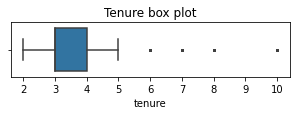

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(5,1))
sns.boxplot(x=hr['tenure'], fliersize=1)
plt.title('Tenure box plot');



In [13]:
# Determine the number of rows containing outliers
(hr['tenure'] > 5).sum()



824

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed

left = (hr['resignation'].value_counts()[1])
print(f"{left} people left the company")
stayed = hr['resignation'].value_counts()[0] 
print(f"{stayed} people stayed at the company")



# Get percentages of people who left vs. stayed
stayed_percent = hr['resignation'].value_counts(normalize=True)[0] * 100
left_percent = hr['resignation'].value_counts(normalize=True)[1] * 100
print(f"{stayed_percent} percent of people stayed at the company")
print(f"{left_percent} percent of people left at the company")

1991 people left the company
10000 people stayed at the company
83.39588024351598 percent of people stayed at the company
16.604119756484028 percent of people left at the company


### Data visualizations

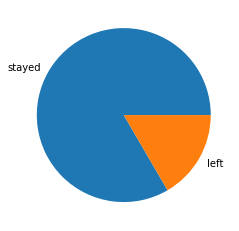

In [15]:
# visualise workers who left vs stayed
plt.pie(hr['resignation'].value_counts(normalize=True),labels=['stayed','left'])
plt.show()



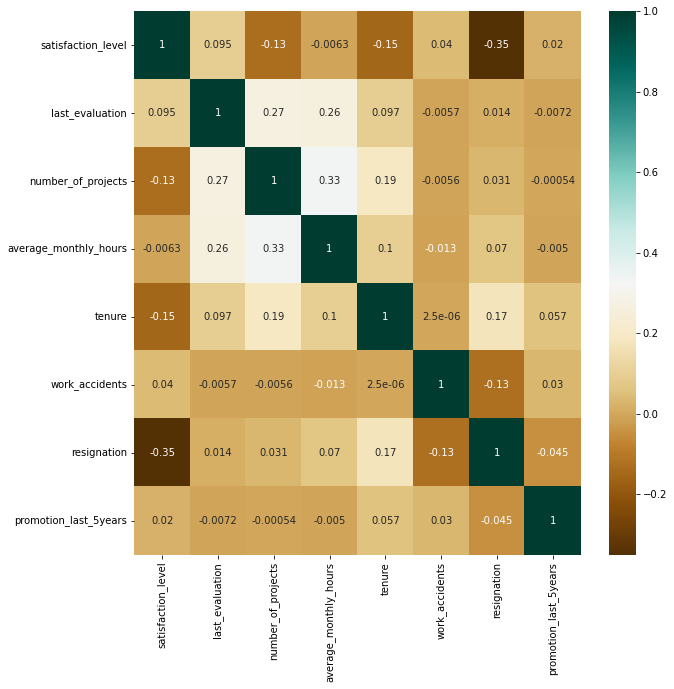

In [16]:
# heatmap to visualise the correlations between the variables
hr_heatmap = hr.drop(['department', 'salary'], axis=1)

plt.figure(figsize=(10,10))
sns.heatmap(hr_heatmap.corr(),annot=True,cmap='BrBG')
plt.show()

To begin visualising the data a heatmap was used to display the correlations between the intergral variables. This will give a valuable picture of what relationships should be of focus and are worth elaborating on.
the highest correlation among variables, not including resignation, was between number of projects and average monthly hours which is to be expected. The second strongest thereafter was between number of projects and last evaluation which could be expored further.
Resignation was most strongly correlated with satisfaction level, tenure and work accidents. These correlations will be observed more closely with further visualisaitons.

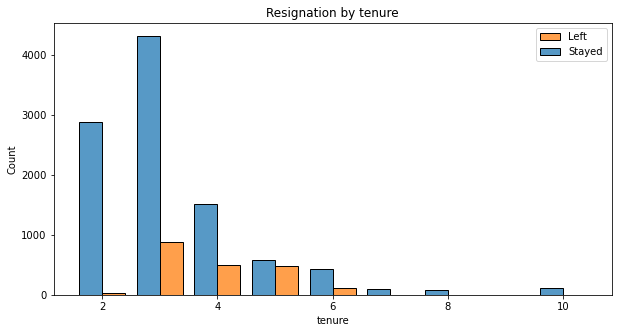

In [17]:
# Create a plot as needed
# tenure count bar chart and resignation
plt.figure(figsize=(10, 5))
p = sns.histplot(data=hr, x='tenure', hue='resignation', multiple='dodge', discrete= True, shrink=0.8)  
plt.title('Resignation by tenure')
plt.legend(title=None, labels=['Left', 'Stayed'])    
plt.show()

- This histogram shows that the majority of the resignation is occuring from the individuals who have been at the company for 3 to 6 years.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

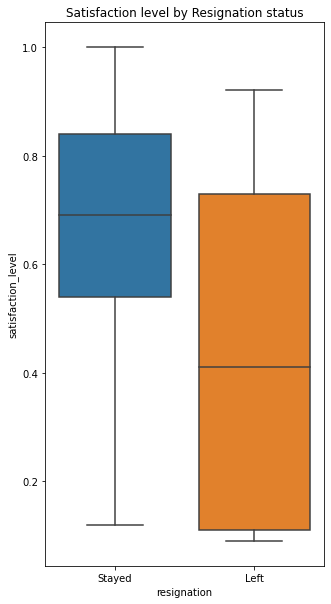

In [18]:
# Create a plot as needed
# box plot of satisfaction level and resignation
plt.figure(figsize=(5,10))
p = sns.boxplot(y=hr['satisfaction_level'],x=hr['resignation'] , fliersize=1)
p.set(xticklabels=(['Stayed', 'Left']))
plt.title('Satisfaction level by Resignation status')
plt.show()

The boxplot shows that the individuals who left showed a lower level of satisfaction in comparison to individuals who stayed at the company.

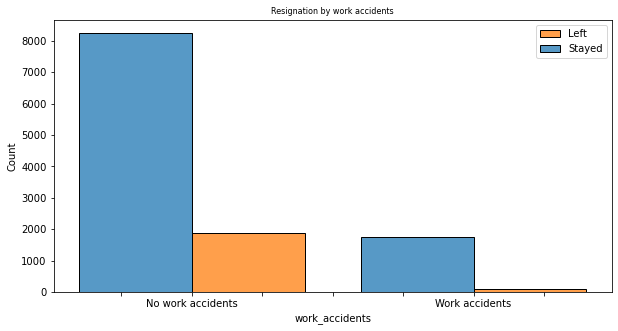

In [19]:
# Create a plot as needed
# count bar chart work accident and resignation
plt.figure(figsize=(10, 5))
p = sns.histplot(data=hr, x='work_accidents', hue='resignation', multiple='dodge', discrete= True, shrink=0.8)  
p.set(xticklabels=([' ', '',  'No work accidents', ' ', ' ', ' ', 'Work accidents']))
plt.title('Resignation by work accidents', fontsize=8)
plt.legend(title=None, labels=['Left', 'Stayed'])    
plt.show()

This histogram shows that more workers have no work accidents than workers who have accidents. The comparision between workers who either having a work accident or not and whether they leave is difficult to visually observe on this histogram because of the difference in the proportion of workers who experience work accidents and those who do not experience work accidents. Findings drawn from this visualisation should be obtained with caution and with the proportions in mind.

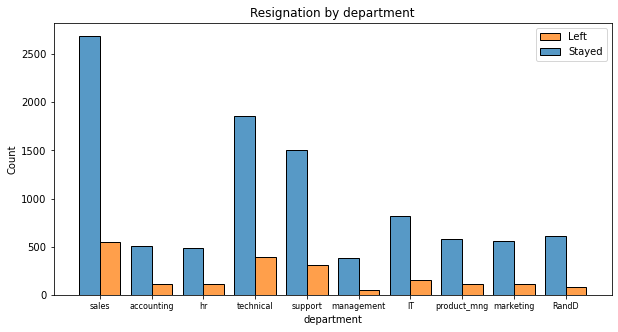

In [20]:
# Create a plot as needed
# department and resignation
plt.figure(figsize=(10, 5))
p = sns.histplot(data=hr, x='department', hue='resignation', multiple='dodge', discrete= True, shrink=0.8)  
plt.xticks(fontsize = 8)
plt.title('Resignation by department')
plt.legend(title=None, labels=['Left', 'Stayed'])    
plt.show()

- This histogram shows that the department that contains the most workers who stayed is the sales department. 
- The department that display fewer workers overall show a relatively high proportion of their workers leaving which suggests and could be because the work disrtibution among these workers in their departments may not be reasonable.

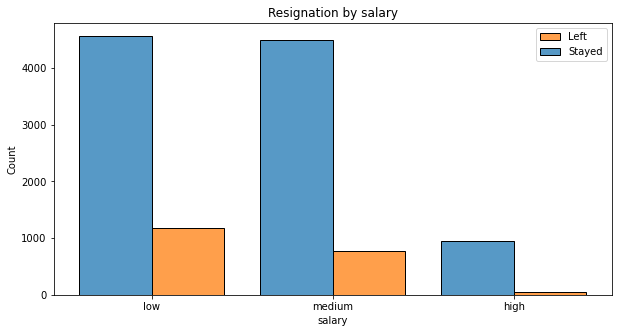

In [21]:
# Create a plot as needed
#salary and resignation
plt.figure(figsize=(10, 5))
p = sns.histplot(data=hr, x='salary', hue='resignation', multiple='dodge', discrete= True, shrink=0.8)  
plt.title('Resignation by salary')
plt.legend(title=None, labels=['Left', 'Stayed'])    
plt.show()

The most common salaries of the workers are low and median salary workers.
The amount of low workers who stayed is similar in both the low and median salary workers. The workers who left is higher among the low salary workers compared to the medium salary workers.
There are not as many high paid workers. Among the high paid workers there are also not many who have left the company. 


## Modeling

### Feature transformation


In [22]:
# Dummy encoding variables so they can be used in the model
hr_modeling = pd.get_dummies(hr, drop_first=True)

In [23]:
# Observing the results of dummy encoding
hr_modeling.head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accidents,resignation,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
# splitting the data into target variable and training/validation/test sets

# X variables
X = hr_modeling.drop(columns=['resignation'])

# y variable
y = hr_modeling['resignation']

# Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [25]:
# observe the split sets

for x in [X_train, X_val, X_test]:
    print(len(x))

7194
2398
2399


Building a random forest model

In [26]:
# Use random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [5, None],
             'max_features': [1.0],
             'max_samples': [0.8, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [1, 2, 3],
             'n_estimators': [300, 400],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [27]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 4min 2s, sys: 374 ms, total: 4min 3s
Wall time: 4min 3s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [28]:
# best score

rf_cv.best_score_

0.9121287962110839

In [29]:
# obtain the best parameters

rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [30]:
# using best model to predict validation data

rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Bulding an XGBoost model

In [32]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 8, 12],
             'min_child_weight': [3, 4,5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [33]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 10min 21s, sys: 4.5 s, total: 10min 25s
Wall time: 5min 15s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

In [34]:
xgb_cv.best_score_

0.910445332315773

In [35]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500}

In [37]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)


In [31]:
# Get validation scores for RF model

# Calculate accuracy

print('Random Forest validation scores')

accuracy = accuracy_score(y_val, rf_val_preds)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_val, rf_val_preds)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_val, rf_val_preds)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_val, rf_val_preds)
print("F1-Score:", f1)

Random Forest validation scores
Accuracy: 0.9791492910758965
Precision: 0.9484536082474226
Recall (Sensitivity): 0.9246231155778895
F1-Score: 0.9363867684478372


In [38]:
# Get validation scores for XGBoost model

# Calculate accuracy

print('XGboost validation scores')

accuracy = accuracy_score(y_val, xgb_val_preds)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_val, xgb_val_preds)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_val, xgb_val_preds)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_val, xgb_val_preds)
print("F1-Score:", f1)

XGboost validation scores
Accuracy: 0.9812343619683069
Precision: 0.9681697612732095
Recall (Sensitivity): 0.9170854271356784
F1-Score: 0.9419354838709677


The XGBoost model obtained higher scores in Accuracy, Precision and F1 scores and only a slightly lower recall score than the random forest model on the validation data. The Champion model is therefore the XGBoost model and it will be used as it is the better model and will be able to make better predictions. =

In [39]:
# Use champion model to predict on test data

xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

In [40]:
# Get test scores for XGBoost model
print('XGboost test scores')

accuracy = accuracy_score(y_test, xgb_test_preds)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, xgb_test_preds)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, xgb_test_preds)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, xgb_test_preds)
print("F1-Score:", f1)


XGboost test scores
Accuracy: 0.9808253438932889
Precision: 0.9512820512820512
Recall (Sensitivity): 0.9321608040201005
F1-Score: 0.9416243654822335


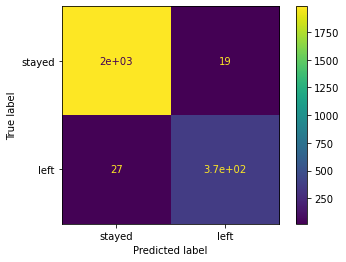

In [41]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['stayed', 'left'])
disp.plot();

The model was able to predict that 370 of the total 397 employees who left and was able to predict 2000 of the 2019 users who stayed.

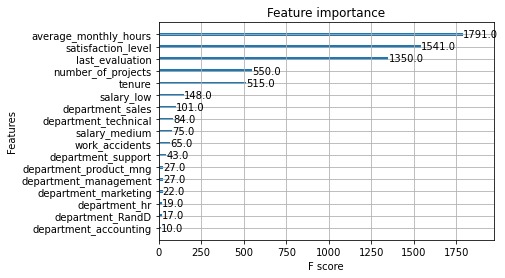

In [42]:
# display feature importance
plot_importance(xgb_cv.best_estimator_);

Conclusion 

- A XGBoost model was the most accurate model in predicting whether an employee at Salifort would leave or not. 
- The model was able to predict 370 of the 397 who left the company. The model can be effectively implemented to reduce the employees who left the company. 
- Results from the model show that the average monthly hours, employee satisfaction level, the number of projects an employee undertakes and tenure are the most important reasons for an employee leaving the company. 
- In line with earlier EDA, the distribution of workers per department suggested that workers within certain departments may be overworked and that they may be given an unrealistic quanitity of work to conduct. The model supports this with the important aspects being work hours number of projects and last evaluation. 
- Salifort should consider the distribution of work/projects and the demands they are setting their workers to improve their employees satisfaction levels. 
- The implimentation of changes in work/project demands could benefit their employees satisfaction as well as the scores of the employees during their evaluations which will induce benefits to both the employees satisfaction and the companies performance as well as achieve the main goal of retaining workers at Salifort.